# Multilayer Gray Model
<div class="alert alert-danger" style= "color:Black; font-family:Calibri; font-size:16px;">
from Brian E. J. Rose notebook, adapted by B. Legras (2021) and Maurice Debray (2022)
</div>

<div class="alert alert-warning" style= "color:Black; font-family:Calibri; font-size:16px;">
Requirements: you need to have climlab, sympy and ipython-tikzmagic packages under python 3 and a working LaTeX environment to display the equations.
The best way to install climlab is to use the anaconda distribution that will install automatically all the dependencies.
LaTeX is usually installed under all Linux distributions. Under Windows, use TexLive (very heavy if all packages are installed) or MiKTex (much lighter).
This notebook runs under chrome or firefox.
Not tested under Mac OS
</div>

## The two-layer grey radiation model (aka the leaky greenhouse)

- Surface temperature is $T_s$
- Atm. temperatures are $T_1, T_2$ where $T_1$ is closest to the surface.
- absorptivity of atm layers is $\epsilon_1, \epsilon_2$
- Surface emission is $\sigma T_s^4$
- Atm emission is $\epsilon_1 \sigma T_1^4, \epsilon_2 \sigma T_2^4$ (up and down)
- Abs = emissivity for atm layers
- Transmissivity for atm layers is $\tau_1, \tau_2$ where $\tau_i = (1-\epsilon_i)$

A figure of the power streams is drawn below.

### Emission
\begin{equation} \left\{
\begin{array}{l}
E_s = \sigma T_s^4 \\
E_1 = \epsilon_1 \sigma T_1^4 \\
E_2 = \epsilon_2 \sigma T_2^4 
\end{array}
\right.
\label{eq:em_temp}
\end{equation}

### Incident radiation

\begin{equation} \left\{
\begin{array}{l}
F_s = \tau_1 E_2 + E_1 \\
F_1 = E_s + E_2 \\
F_2 = \tau_1 E_s + E_1 
\end{array}
\right.
\label{eq:radiation}
\end{equation}

### Net radiation
(absorptivity) * incident - emission

\begin{equation} \left\{
\begin{array}{l}
R_s = F_s - E_s \\
R_1 = \epsilon_1 F_1 - 2 E_1 \\
R_2 = \epsilon_2 F_2 - 2 E_2 
\end{array}
\right.
\label{eq:net_rad}
\end{equation}

### OLR (Outgoing Longwave Radiation)

\begin{align}
OLR &= \tau_2 F_2 + E_2 \\
&= \tau_1 \tau_2 E_s + \tau_2 E_1 + E_2 \\
&= \tau_1 \tau_2 \sigma T_s^4 + \tau_2 \epsilon_1 \sigma T_1^4 + \epsilon_2 \sigma T_2^4 
\end{align}

### Net radiation in terms of emissions

Putting together \ref{eq:radiation} and \ref{eq:net_rad}, we get:

\begin{equation} \left\{
\begin{array}{l}
R_s = \tau_1 E_2 + E_1 - E_s \\
R_1 = \epsilon_1 (E_s + E_2) - 2 E_1 \\
R_2 = \epsilon_2 (\tau_1 E_s + E_1) - 2 E_2 
\end{array}
\right.
\end{equation}

### Net radiation in terms of temperatures

and then given \ref{eq:em_temp}:

\begin{equation} \left\{
\begin{array}{l}
R_s = \tau_1 \epsilon_2 \sigma T_2^4 + \epsilon_1 \sigma T_1^4 - \sigma T_s^4 \\
R_1 = \epsilon_1 (\sigma T_s^4 + \epsilon_2 \sigma T_2^4) - 2 \epsilon_1 \sigma T_1^4 \\
R_2 = \epsilon_2 (\tau_1 \sigma T_s^4 + \epsilon_1 \sigma T_1^4) - 2 \epsilon_2 \sigma T_2^4
\end{array}
\right.
\end{equation}

### Net radiation in terms of temperatures and absorptivities

Simplifying the transmitivities:

\begin{equation} \left\{
\begin{array}{l}
R_s = (1-\epsilon_1) \epsilon_2 \sigma T_2^4 + \epsilon_1 \sigma T_1^4 - \sigma T_s^4 \\
R_1 = \epsilon_1 (\sigma T_s^4 + \epsilon_2 \sigma T_2^4) - 2 \epsilon_1 \sigma T_1^4 \\
R_2 = \epsilon_2 ((1-\epsilon_1) \sigma T_s^4 + \epsilon_1 \sigma T_1^4) - 2 \epsilon_2 \sigma T_2^4 
\end{array}
\right.
\end{equation}

In [1]:
%load_ext tikzmagic

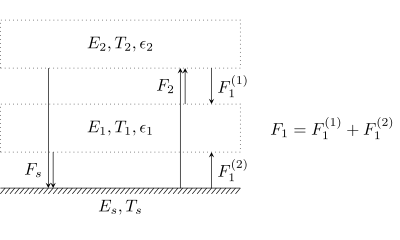

In [2]:
%%tikz -f svg
\draw (0,0) -- (5,0);

\node[below] at (2.5,-0.12) {$E_s, T_s$};

\foreach \i in {0.1, 0.2, ..., 5} { \draw (\i, 0) -- ++(-0.1, -0.12); };

\draw [dotted] (0, 0.75) rectangle node {$E_1, T_1, \epsilon_1$} ++(5, 1);
\draw [dotted] (0, 2.5) rectangle node {$E_2, T_2, \epsilon_2$} ++(5, 1);

\draw [-stealth] (1,2.5) -- ++(0,-2.5);
\draw [-stealth] (1.1,0.75) -- ++(0,-0.75);
\node[left] at (1,0.375) {$F_s$};

\draw [stealth-] (3.75,2.5) -- ++(0,-2.5);
\draw [stealth-] (3.85,2.5) -- ++(0,-0.75);
\node[left] at (3.757,2.125) {$F_2$};


\draw [-stealth] (4.4,2.5) -- node[right] {$F_1^{(1)}$} ++(0,-0.75);
\draw [stealth-] (4.4,0.75) -- node[right] {$F_1^{(2)}$} ++(0,-0.75);
\node[right] at (5.5, 1.25) {$F_1 = F_1^{(1)} + F_1^{(2)}$};

## Solve for radiative equilibrium
Need to add the solar energy source. We assume atm is transparent, solar is all absorbed at the surface.

$$ R_1 = R_2 = 0$$

$$ R_s = - (1-\alpha) Q $$

Introduce useful notation shorthand:

$$ (1-\alpha) Q = \sigma T_e^4 $$

This gives a 3x3 system which is **linear in $T^4$** (divide through by $\sigma$)

$$ - T_s^4 + \epsilon_1 T_1^4 + (1-\epsilon_1) \epsilon_2  T_2^4 + T_e^4 = 0 $$

$$ \epsilon_1 T_s^4 - 2 \epsilon_1 T_1^4 + \epsilon_1 \epsilon_2  T_2^4 = 0$$

$$ \epsilon_2 (1-\epsilon_1) T_s^4 + \epsilon_1 \epsilon_2 T_1^4 - 2 \epsilon_2 T_2^4 = 0$$

Here we use the `sympy` module to solve the algebraic system symbolically.

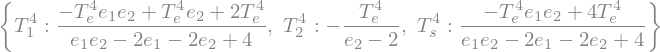

In [1]:
import sympy
sympy.init_printing()
T_s, T_1, T_2, T_e, e_1, e_2 = sympy.symbols('T_s, T_1, T_2, T_e, e_1, e_2', positive=True )
system = [-T_s**4 + e_1*T_1**4 + e_2*(1-e_1)*T_2**4 + T_e**4,
              e_1*T_s**4 - 2*e_1*T_1**4 + e_1*e_2*T_2**4,
              e_2*(1-e_1)*T_s**4 + e_1*e_2*T_1**4 - 2*e_2*T_2**4]
out1 = sympy.solve( system, [T_s** 4, T_1**4, T_2**4])
out1

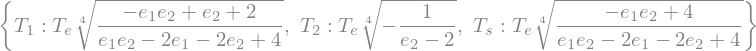

In [2]:
quarter = sympy.Rational(1,4)
out2 = {}
for var4, formula in out1.items():
    var = (var4)**quarter
    out2[var] = sympy.simplify(formula**quarter)
out2

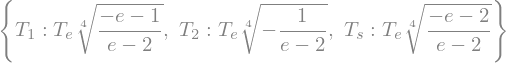

In [3]:
#  The special case of equal absorptivities
e = sympy.symbols('e')
out3 = {}
for var4, formula in out1.items():
    var = (var4)**quarter
    simple_formula = sympy.cancel(formula.subs([(e_2, e),(e_1, e)]))
    out3[var] = sympy.simplify( simple_formula**quarter )
out3

The solution is

\begin{align} 
T_s^4 &= T_e^4 \frac{4 - \epsilon_1 \epsilon_2}{4 + \epsilon_1 \epsilon_2 - 2 \epsilon_1 - 2 \epsilon_2}  \\
T_1^4 &= T_e^4 \frac{2 -\epsilon_1 \epsilon_2 + \epsilon_2}{4 + \epsilon_1 \epsilon_2 - 2 \epsilon_1 - 2 \epsilon_2} \\
T_2^4 &= T_e^4 \frac{ 1}{2 - \epsilon_2}
\end{align}

In the special case $\epsilon_1 = \epsilon_2$ this reduces to

\begin{align} 
T_s^4 &= T_e^4 \frac{2+\epsilon}{2-\epsilon}  \\
T_1^4 &= T_e^4 \frac{1+\epsilon}{2-\epsilon} \\
T_2^4 &= T_e^4 \frac{ 1}{2 - \epsilon}
\end{align}

We then compute $T_s$ for reasonable values of $e_{1,2}

In [4]:
for var, formula in out2.items():
    print(var,formula.subs([(T_e, 255), (e_1, 0.4), (e_2, 0.4)]), sep= " = ", end = " K\n")

T_s = 282.203889523582 K
T_1 = 207.388511616468*2**(1/4) K
T_2 = 226.730624779963 K


In [5]:
# Coding up the analytical solutions for radiative equilibrium
#  These use the analytical results returned by sympy and wrap them in callable functions

def Ts(Te, e1, e2):
    #return Te*((4-e1*e2)/(4+e1*e2-2*(e1+e2)))**0.25
    return out2[T_s].subs([(T_e, Te), (e_1, e1), (e_2, e2)])
def T1(Te, e1, e2):
    #return Te*((2+e2-e1*e2)/(4+e1*e2-2*(e1+e2)))**0.25
    return out2[T_1].subs([(T_e, Te), (e_1, e1), (e_2, e2)])
def T2(Te, e1, e2):
    #return Te*(1/(2-e2))**0.25
    return out2[T_2].subs([(T_e, Te), (e_1, e1), (e_2, e2)])

## Now define a gray radiation model that does the same job
Achtung: Beware the numerical model labels levels start from 1 at the top

In [9]:
%matplotlib inline
import numpy as np
from climlab import constants as const
import climlab

In [10]:
mycolumn = climlab.GreyRadiationModel(num_lev=2 )

<div class="alert alert-warning" style= "color:Black; font-family:Calibri; font-size:16px;">
Let us look at what is contained in the model we just defined
</div>

In [11]:
print(mycolumn)
print(mycolumn.param)

climlab Process of type <class 'climlab.model.column.GreyRadiationModel'>. 
State variables and domain shapes: 
  Ts: (1,) 
  Tatm: (2,) 
The subprocess tree: 
Untitled: <class 'climlab.model.column.GreyRadiationModel'>
   LW: <class 'climlab.radiation.greygas.GreyGas'>
   SW: <class 'climlab.radiation.greygas.GreyGasSW'>
   insolation: <class 'climlab.radiation.insolation.FixedInsolation'>

{'timestep': 86400.0, 'water_depth': 1.0, 'albedo_sfc': 0.299, 'Q': 341.3, 'abs_coeff': 0.0001229}


<div class="alert alert-info" style= "color:RoyalBlue; font-family:Calibri; font-size:16px;">
The model is made of three subprocesses (LW, SW, and Insolation) and has four parameters.
The timestep for numerical integration is one day. The water_depth is not used in this application.
Q is the incoming mean solar radiation and abs_coeff is used to calculate the absorption of the layers
of the atmosphere, each one being of equal height in pressure (that is two layers of 500 hPa in this example)
</div>

<div class="alert alert-warning" style= "color:Black; font-family:Calibri; font-size:16px;">
Look at the longwave and shortwave subprocesses 
</div>

In [12]:
print(mycolumn.subprocess['LW'])
print('absorptivity',mycolumn.subprocess['LW'].absorptivity)

climlab Process of type <class 'climlab.radiation.greygas.GreyGas'>. 
State variables and domain shapes: 
  Ts: (1,) 
  Tatm: (2,) 
The subprocess tree: 
Untitled: <class 'climlab.radiation.greygas.GreyGas'>

absorptivity [0.47737425 0.47737425]


In [13]:
mycolumn.Ts

Field([288.])

In [14]:
print(mycolumn.subprocess['SW'])
print('absorptivity',mycolumn.subprocess['SW'].absorptivity)

climlab Process of type <class 'climlab.radiation.greygas.GreyGasSW'>. 
State variables and domain shapes: 
  Ts: (1,) 
  Tatm: (2,) 
The subprocess tree: 
Untitled: <class 'climlab.radiation.greygas.GreyGasSW'>

absorptivity [0. 0.]


<div class="alert alert-warning" style= "color:Black; font-family:Calibri; font-size:16px;">
Integrate the model over ten years until it reaches an equilibrium
Print the initial and the final temperatures
</div>

In [15]:
print(mycolumn.Ts)
print(mycolumn.Tatm)
mycolumn.integrate_years(10.)
print(mycolumn.Ts)
print(mycolumn.Tatm)

[288.]
[200. 278.]
Integrating for 3652 steps, 3652.4220000000005 days, or 10.0 years.
Total elapsed time is 9.998844602294039 years.
[287.84605967]
[229.43643402 252.95019305]


<div class="alert alert-warning" style= "color:Black; font-family:Calibri; font-size:16px;">
What would have been the ground temperature in the absence of atmosphere ?
</div>

In [16]:
ASR = (1-mycolumn.param['albedo_sfc'])*mycolumn.param['Q']
Te = (ASR/const.sigma)**0.25
print(Te)
print((mycolumn.SW_absorbed_sfc/const.sigma)**0.25)

254.86528043090246
[254.86528043]


<div class="alert alert-warning" style= "color:Black; font-family:Calibri; font-size:16px;">
Check what is the value of the OLR and compare it to the value of the ASR
</div>

In [17]:
print(mycolumn.OLR,ASR)

[239.2513] 239.25130000000004


All the available variables contained in mycolumn and its subprocesses are listed here

In [18]:
print('mycolumn ',mycolumn.__dict__.keys(),'\n')
print('LW  ',mycolumn.subprocess.LW.__dict__.keys(),'\n')
print('SW  ',mycolumn.subprocess.LW.__dict__.keys())      

mycolumn  dict_keys(['tendencies', 'verbose', 'name', 'domains', 'state', 'Ts', 'Tatm', 'param', '_diag_vars', '_input_vars', 'creation_date', 'subprocess', 'timeave', 'time', 'time_type', 'topdown', 'has_process_type_list', 'flux_from_sfc', 'flux_to_sfc', 'flux_to_space', 'absorbed', 'absorbed_total', 'emission', 'emission_sfc', 'flux_reflected_up', 'insolation', 'coszen', 'OLR', 'LW_down_sfc', 'LW_up_sfc', 'LW_absorbed_sfc', 'LW_absorbed_atm', 'LW_emission', 'ASR', 'SW_absorbed_sfc', 'SW_absorbed_atm', 'SW_up_sfc', 'SW_up_TOA', 'SW_down_TOA', 'planetary_albedo', 'process_types', 'SW_down_sfc']) 

LW   dict_keys(['tendencies', 'verbose', 'name', 'domains', 'state', 'Ts', 'Tatm', 'param', '_diag_vars', '_input_vars', 'creation_date', 'subprocess', 'timeave', 'time', 'time_type', 'topdown', 'has_process_type_list', 'heating_rate', 'flux_from_space', 'flux_from_sfc', 'flux_to_sfc', 'flux_to_space', 'absorbed', 'absorbed_total', 'trans', 'emissivity_sfc', 'albedo_sfc', 'emission', 'emissi

## Check numerical versus analytical results

#### First define a test function that will be used for comparing with the analytical model
Use a tolerance value to test if the results are the same.

In [19]:
tol = 0.01

# Reversal of labels is accounted here (in the reading of e1, e2 and the assignements)
def test_2level(col):
    (e2, e1)= col.subprocess['LW'].absorptivity
    ASR = (1-col.param['albedo_sfc'])*col.param['Q']
    Te = (ASR/const.sigma)**0.25
    print('Te:',Te)
    print('Surface:')
    num = col.Ts
    anal = Ts(Te,e1,e2)
    print('  Numerical: %.2f   Analytical: %.2f    Same:' %(num, anal) , abs(num - anal)<tol)
    print('Level 1')
    num = col.Tatm[0]
    anal = T2(Te,e1,e2)
    print('  Numerical: %.2f   Analytical: %.2f    Same:' %(num, anal) , abs(num - anal)<tol)
    print('Level 2')
    num = col.Tatm[1]
    anal = T1(Te,e1,e2)
    print('  Numerical: %.2f   Analytical: %.2f    Same:' %(num, anal) , abs(num - anal)<tol)

In [20]:
test_2level(mycolumn)

Te: 254.86528043090246
Surface:
  Numerical: 287.85   Analytical: 287.85    Same: [ True]
Level 1
  Numerical: 229.44   Analytical: 229.44    Same: True
Level 2
  Numerical: 252.95   Analytical: 252.95    Same: True


In [21]:
e1 = 0.4
e2 = 0.4
mycolumn.subprocess['LW'].absorptivity = np.array([e1,e2])
mycolumn.integrate_years(10.)

Integrating for 3652 steps, 3652.4220000000005 days, or 10.0 years.
Total elapsed time is 19.997689204588077 years.


In [22]:
test_2level(mycolumn)

Te: 254.86528043090246
Surface:
  Numerical: 282.05   Analytical: 282.05    Same: [ True]
Level 1
  Numerical: 226.61   Analytical: 226.61    Same: True
Level 2
  Numerical: 246.50   Analytical: 246.50    Same: True


In [23]:
# Here the absorption is defined from the abs_coeff in the model, that is used by the LW subprocess initialization
# Changing it after cloning does not work
col1 = climlab.GreyRadiationModel(num_lev=2, abs_coeff=1.9E-4)
(e1, e2) = col1.subprocess['LW'].absorptivity
print(e1, e2)
col1.integrate_years(10.)
test_2level(col1)

0.6529209621993127 0.6529209621993127
Integrating for 3652 steps, 3652.4220000000005 days, or 10.0 years.
Total elapsed time is 9.998844602294039 years.
Te: 254.86528043090246
Surface:
  Numerical: 301.92   Analytical: 301.92    Same: [ True]
Level 1
  Numerical: 236.57   Analytical: 236.57    Same: True
Level 2
  Numerical: 268.24   Analytical: 268.24    Same: True


In [24]:
# Here we can clone col1 because the modification is made on the LW absorptivity
col2 = climlab.process_like(col1)
lw = col2.subprocess['LW']
(e1, e2) = lw.absorptivity
e1 *= 1.2
lw.absorptivity = np.array([e1, e2])
col2.integrate_years(10.)
test_2level(col2)

Integrating for 3652 steps, 3652.4220000000005 days, or 10.0 years.
Total elapsed time is 19.997689204588077 years.
Te: 254.86528043090246
Surface:
  Numerical: 307.85   Analytical: 307.85    Same: [ True]
Level 1
  Numerical: 242.68   Analytical: 242.68    Same: True
Level 2
  Numerical: 276.56   Analytical: 276.56    Same: True


### Conclusion: The Two-level model works

## Three-layer model

Extend the analysis to three layers.
Start numbering the layers from 0 to be consistent with array indexing.


In [25]:
T_s, T_0, T_1, T_2, T_e, epsilon_0, epsilon_1, epsilon_2, sigma = \
    sympy.symbols('T_s, T_0, T_1, T_2, T_e, epsilon_0, epsilon_1, epsilon_2, sigma', positive=True )

Define the transmissivities $\tau_i$ for layers $i=0, 1, \dots, N-1$

In [26]:
tau_0 = (1-epsilon_0)
tau_1 = (1-epsilon_1)
tau_2 = (1-epsilon_2)
tau_0, tau_1, tau_2

Note that if the atmosphere has $N$ layers then $\epsilon_N = 0$

Define the emissions for each layer:

In [27]:
E_s = sigma*T_s**4
E_0 = epsilon_0*sigma*T_0**4
E_1 = epsilon_1*sigma*T_1**4
E_2 = epsilon_2*sigma*T_2**4
E_s, E_0, E_1, E_2

Define the longwave fluxes incident on each layer, $F_{i}$

Note that if the atmosphere has $N$ layers then $F_{N}$ is the OLR (emission to space)

In [28]:
F_s = E_0 + tau_0*E_1 + tau_0*tau_1*E_2
F_0 = E_s + E_1 + tau_1*E_2
F_1 = tau_0*E_s + E_0 + E_2
F_2 = tau_1*tau_0*E_s + tau_1*E_0 + E_1
F_3 = tau_2*tau_1*tau_0*E_s + tau_2*tau_1*E_0 + tau_2*E_1 + E_2

F_s, F_0, F_1, F_2, F_3

Now define the net absorbed longwave radiation (flux divergence) in each layer.

In [29]:
R_s = F_s - E_s
R_0 = epsilon_0*F_0 - 2*E_0
R_1 = epsilon_1*F_1 - 2*E_1
R_2 = epsilon_2*F_2 - 2*E_2

R_s, R_0, R_1, R_2

### Solve for radiative equilibrium

Use `sympy.solve` to automatically solve the algebraic system.

We will solve for the **radiative equilibrium temperatures** in two steps:

- First solve for $T_i^4$, which is a purely linear problem.
- Then take the fourth roots to solve for the temperatures.

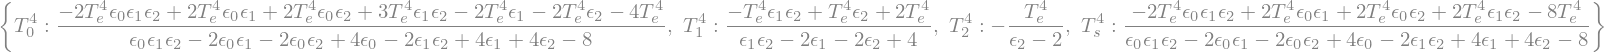

In [30]:
out1 = sympy.solve([R_s + sigma*T_e**4, R_0, R_1, R_2],
            [T_s**4, T_0**4, T_1**4, T_2**4])
out1

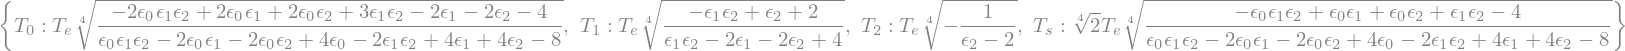

In [31]:
quarter = sympy.Rational(1,4)
out2 = {}
for var4, formula in out1.items():
    var = (var4)**quarter
    out2[var] = sympy.simplify(formula**quarter)
out2

Now wrap these analytical radiative equilibrium solutions in callable functions:

In [32]:
def Ts(Te, e0, e1, e2):
    return out2[T_s].subs([(T_e, Te), (epsilon_0, e0), (epsilon_1, e1), (epsilon_2, e2)])
def T0(Te, e0, e1, e2):
    return out2[T_0].subs([(T_e, Te), (epsilon_0, e0), (epsilon_1, e1), (epsilon_2, e2)])
def T1(Te, e0, e1, e2):
    return out2[T_1].subs([(T_e, Te), (epsilon_0, e0), (epsilon_1, e1), (epsilon_2, e2)])
def T2(Te, e0, e1, e2):
    return out2[T_2].subs([(T_e, Te), (epsilon_0, e0), (epsilon_1, e1), (epsilon_2, e2)])

### Compare numerical and analytical solutions for radiative equilibrium

Define a function that takes a `climlab.GreyRadiationModel` object (which should be first integrated out to equilibrium), and compares the numerical solution to our analytical solution.

In [33]:
tol = 0.01

def test_3level(col):
    (e2, e1, e0)= col.subprocess['LW'].absorptivity
    ASR = (1-col.param['albedo_sfc'])*col.param['Q']
    Te = (ASR/const.sigma)**0.25
    print('Surface:')
    num = col.Ts
    anal = Ts(Te,e0,e1,e2)
    print('  Numerical: %.2f   Analytical: %.2f    Same:' %(num, anal) , abs(num - anal)<tol)
    print('Level 0')
    num = col.Tatm[0]
    anal = T2(Te,e0,e1,e2)
    print('  Numerical: %.2f   Analytical: %.2f    Same:' %(num, anal) , abs(num - anal)<tol)
    print('Level 1')
    num = col.Tatm[1]
    anal = T1(Te,e0,e1,e2)
    print('  Numerical: %.2f   Analytical: %.2f    Same:' %(num, anal) , abs(num - anal)<tol)
    print('Level 2')
    num = col.Tatm[2]
    anal = T0(Te,e0,e1,e2)
    print('  Numerical: %.2f   Analytical: %.2f    Same:' %(num, anal) , abs(num - anal)<tol)

In [34]:
col = climlab.GreyRadiationModel( num_lev=3 )
col.integrate_years(10.)
test_3level(col)

Integrating for 3652 steps, 3652.4220000000005 days, or 10.0 years.
Total elapsed time is 9.998844602294039 years.
Surface:
  Numerical: 287.85   Analytical: 287.85    Same: [ True]
Level 0
  Numerical: 224.73   Analytical: 224.73    Same: True
Level 1
  Numerical: 242.05   Analytical: 242.05    Same: True
Level 2
  Numerical: 256.29   Analytical: 256.29    Same: True


In [35]:
e0 = 0.3
e1 = 0.6
e2 = 0.2
col.subprocess['LW'].absorptivity = np.array([e0,e1,e2])
col.integrate_years(10.)
test_3level(col)

Integrating for 3652 steps, 3652.4220000000005 days, or 10.0 years.
Total elapsed time is 19.997689204588077 years.
Surface:
  Numerical: 291.71   Analytical: 291.71    Same: [ True]
Level 0
  Numerical: 223.20   Analytical: 223.20    Same: True
Level 1
  Numerical: 247.60   Analytical: 247.60    Same: True
Level 2
  Numerical: 264.53   Analytical: 264.53    Same: True


### Conclusion: The three-level model works

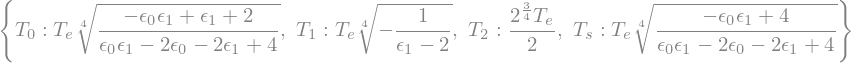

In [36]:
# The 3-layer solution reduces to two layer solution if we set e_2 = 0
out3 = {}
for var, formula in out2.items():
    if var is not T_2:
        out3[var] = sympy.simplify(formula.subs(epsilon_2,0))
out3

## Applications of the three layer model

### Increasing the absorption of the atmospheric layers 

In [37]:
# Non modified version
col1 = climlab.GreyRadiationModel(num_lev=3)
col1.integrate_years(10.)
print(col1.Ts,col1.Tatm,col1.subprocess['LW'].absorptivity)
print(col1.OLR)
# Adding absorption uniformly to all layers, starting from the final state of the unmodified model
col2 = climlab.GreyRadiationModel(num_lev=3,abs_coeff=2.E-4,state=col1.state)
col2.compute_diagnostics()
print(col2.OLR)
col2.integrate_years(10.)
print(col2.Ts,col2.Tatm,col2.subprocess['LW'].absorptivity)
print(col2.OLR)

Integrating for 3652 steps, 3652.4220000000005 days, or 10.0 years.
Total elapsed time is 9.998844602294039 years.
[287.84605967] [224.72996022 242.04871973 256.28908916] [0.3457589 0.3457589 0.3457589]
[239.2513]
[198.64071199]
Integrating for 3652 steps, 3652.4220000000005 days, or 10.0 years.
Total elapsed time is 9.998844602294039 years.
[303.8578464] [230.58996359 255.51297379 274.73973239] [0.50761421 0.50761421 0.50761421]
[239.2513]


### Adding some SW absorption and diffusion in the atmospheric lowest layers

In [38]:
# Non modified version
col1 = climlab.GreyRadiationModel(num_lev=3)
col1.integrate_years(10.)
print(col1.Ts,col1.Tatm)
print(col1.OLR)
# Deriving a new model from the previous, adding absorption, diffuson (reflectivity). 
# Transmissivity is automatically updated  
col2 = climlab.process_like(col1)
col2.subprocess['SW'].absorptivity = np.array([0.,0.01,0.05])
col2.subprocess['SW'].reflectivity = np.array([0.,0.02,0.1])
col2.compute_diagnostics()
print(col2.OLR)
col2.integrate_years(10.)
print(col2.Ts,col2.Tatm)
print(col2.OLR)

Integrating for 3652 steps, 3652.4220000000005 days, or 10.0 years.
Total elapsed time is 9.998844602294039 years.
[287.84605967] [224.72996022 242.04871973 256.28908916]
[239.2513]
[239.2513]
Integrating for 3652 steps, 3652.4220000000005 days, or 10.0 years.
Total elapsed time is 19.997689204588077 years.
[281.51069386] [223.24459368 242.79117635 262.74489338]
[232.98835123]


In [39]:
col1 = climlab.GreyRadiationModel(num_lev=3)
print(col1.subprocess['LW'].absorptivity,col1.subprocess['LW'].emissivity,col1.subprocess['LW'].transmissivity)
col1.subprocess['LW'].absorptivity = np.array([0.2,0.3,0.6])
print(col1.subprocess['LW'].absorptivity,col1.subprocess['LW'].emissivity,col1.subprocess['LW'].transmissivity)
print(col1.subprocess['SW'].absorptivity,col1.subprocess['SW'].reflectivity,col1.subprocess['SW'].transmissivity)
col1.subprocess['SW'].absorptivity = np.array([0.1,0.1,0.1])
col1.subprocess['SW'].reflectivity = np.array([0.2,0.2,0.2])
print(col1.subprocess['SW'].absorptivity,col1.subprocess['SW'].reflectivity,col1.subprocess['SW'].transmissivity)

[0.3457589 0.3457589 0.3457589] [0.3457589 0.3457589 0.3457589] [0.6542411 0.6542411 0.6542411]
[0.2 0.3 0.6] [0.2 0.3 0.6] [0.8 0.7 0.4]
[0. 0. 0.] [0. 0. 0.] [1. 1. 1.]
[0.1 0.1 0.1] [0.2 0.2 0.2] [0.7 0.7 0.7]


## Exercises
The questions can be treated in the equilibrium mode calculating the resulting temperatures, or as a modifier for a given temperature profile showing them the changes in the fluxes.

<div class="alert alert-warning" style= "color:Black; font-family:Calibri; font-size:16px;">
1. We want to insert a cloud layer. What are the parameters that need to be adjusted? Do it with the middle layer of the three 
layer model. Diagnose the effect and comment.
</div>

Since clouds are opaque, we must increase the middle layer absorbtivity $\epsilon_1$ (or equivalently decrease the middle layer tranmitivity $\tau_1$).

<div class="alert alert-warning" style= "color:Black; font-family:Calibri; font-size:16px;">
2. We want to see the effect of the altitude of the cloud layer. Do it using a model with an adapted number of layers. You can plot the temperature profile as a function of the altitude of the layer.
</div>

<div class="alert alert-warning" style= "color:Black; font-family:Calibri; font-size:16px;">
3. Study now the effect of the thickness of the cloud. The parameters to vary are the altitude of the base and of the summit of the cloud.
</div>

<div class="alert alert-warning" style= "color:Black; font-family:Calibri; font-size:16px;">
4. Study the effect of a thin cirrus cloud which is quasi-transparent in the visible range but absorbs in the infrared.
</div>

<div class="alert alert-info" style= "color:black; font-family:Calibri; font-size:16px;">

** To export the workbook on pdf from printing:**
<br>
<br>
1/ From the top menu bar, select **File**<br>
2/ Select the **download as** from the drop menu<br>
3/ Then select *** PDF via LaTeX (.pdf) **

<br>
<br>
<br>
<span style= "text-align: center; font-weight:bold; font-family:calibri; font-size:20px; color:Firebrick;"></span>
</div>